In [1]:
from multiscaleio.datasets.get_arpa import get_arpa
from multiscaleio.core.expansions import ReshiftedExpansion, MultiscaleExpansion
import pandas as pd
import numpy as np

In [2]:
arpa21 = get_arpa(n_jobs=5, years=["2020", "2021"]).query("provincia=='MI'")

In [3]:
rs = ReshiftedExpansion(window=4, date_col="data", keep_t0=True)
data = rs.fit_transform(arpa21.drop(["lng", "lat", "provincia"], axis=1))

In [4]:
sh = pd.DataFrame(data, columns=rs.get_feature_names_out())
sh.head()

,data,Ammoniaca,Arsenico,Benzene,Benzo(a)pirene,Biossido di Azoto,Biossido di Zolfo,BlackCarbon,Cadmio,Monossido di Azoto,...,BlackCarbon_shift_3,Cadmio_shift_3,Monossido di Azoto_shift_3,Monossido di Carbonio_shift_3,Nikel_shift_3,Ossidi di Azoto_shift_3,Ozono_shift_3,PM10 (SM2005)_shift_3,Particelle sospese PM2.5_shift_3,Piombo_shift_3
0,2020-01-01,13.4,NaN,3.825,4.178,59.623177,3.482639,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,13.0,0.85,2.975,NaN,59.783715,3.282639,5.6,0.232333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,14.7,NaN,4.075,NaN,65.974219,3.619444,8.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-04,12.7,NaN,3.45,2.312,57.198299,3.522917,7.0,NaN,NaN,...,8.0,NaN,NaN,1.561667,NaN,188.961111,8.579167,140.857143,135.0,NaN
4,2020-01-05,11.9,NaN,2.7,NaN,63.045573,3.128472,4.9,NaN,NaN,...,5.6,0.232333,NaN,1.3625,3.020333,170.834722,7.638194,62.857143,51.666667,12.481333


In [5]:
ms = MultiscaleExpansion(scale=[3, 7], date_col="data")
data = ms.fit_transform(sh)

In [6]:
sc = pd.DataFrame(data, columns=ms.get_feature_names_out())
sc.head()

,data,Ammoniaca_mean_3,Arsenico_mean_3,Benzene_mean_3,Benzo(a)pirene_mean_3,Biossido di Azoto_mean_3,Biossido di Zolfo_mean_3,BlackCarbon_mean_3,Cadmio_mean_3,Monossido di Azoto_mean_3,...,BlackCarbon_shift_3_mean_7,Cadmio_shift_3_mean_7,Monossido di Azoto_shift_3_mean_7,Monossido di Carbonio_shift_3_mean_7,Nikel_shift_3_mean_7,Ossidi di Azoto_shift_3_mean_7,Ozono_shift_3_mean_7,PM10 (SM2005)_shift_3_mean_7,Particelle sospese PM2.5_shift_3_mean_7,Piombo_shift_3_mean_7
0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,13.7,NaN,3.625,NaN,61.793704,3.461574,7.233333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-04,13.466667,NaN,3.5,NaN,60.985411,3.475,6.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,13.1,NaN,3.408333,NaN,62.072697,3.423611,6.666667,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
arpa_ = arpa21.drop(["provincia", "lng", "lat", "data"], axis=1)

In [24]:
from multiscaleio.core.interpolate import ProphetInterpolator

pdata = arpa21[["data", "Ozono"]].reset_index(drop=True).copy()
pdata["Ozono"][int(len(pdata)/1.15):] = np.nan
pi = ProphetInterpolator(
    date_index="data", 
    uncertainty_fit_logs=True, 
    add_sampled_uncertainty=False,
    growth="flat"
)
int_ = pi.fit_transform(pdata)

C:\Users\Tobia\AppData\Local\Temp\ipykernel_17852\3305650676.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdata["Ozono"][int(len(pdata)/1.15):] = np.nan


<AxesSubplot: >

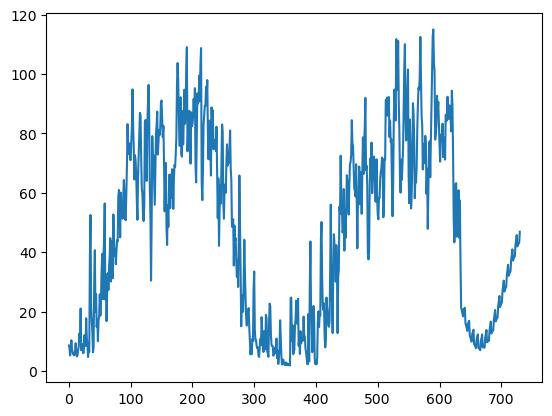

In [25]:
pd.Series(int_).plot()

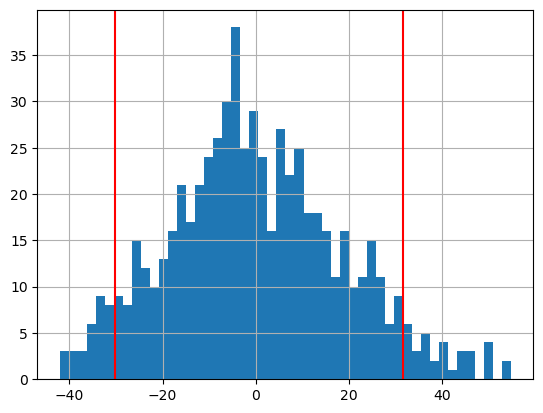

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pi.err.hist(bins=50, ax=ax)
ax.axvline(pi.err.quantile(.95), c="r")
ax.axvline(pi.err.quantile(.05), c="r")

In [60]:
from prophet import Prophet
from multiscaleio.core.time_utils import auto_seasonality

pdata = pdata.rename({"data": "ds", "Ozono": "y"}, axis=1)
train = pdata[:int(len(pdata)/1.15)]
test = pd.DataFrame(pdata[int(len(pdata)/1.15):]["ds"])

seas_per = auto_seasonality(train["y"], nperseg=len(train["y"].dropna()))
p = Prophet(growth="flat", yearly_seasonality=True)
# _ = p.add_seasonality("auto", seas_per, fourier_order=3)

_ = p.fit(train)
pred = p.predict(test)

<AxesSubplot: >

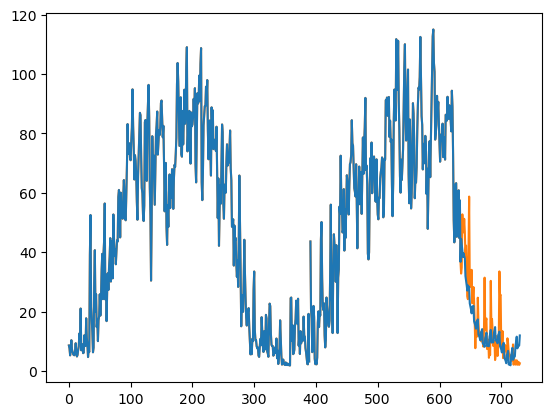

In [62]:
import matplotlib.pyplot as plt

pd.concat((train.y, pred.yhat), axis=0).reset_index(drop=True).plot(zorder=1)
arpa21["Ozono"].reset_index(drop=True).plot(zorder=-1)